In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wrangle import wrangle, wrangle_explore
from sklearn.model_selection import train_test_split

# Stats
from scipy.stats import mannwhitneyu
from scipy.stats import levene

# Viewing Options
pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")
import warnings
warnings.filterwarnings("ignore")

In [2]:
train, validate, test = wrangle_explore()

# What are drivers for coffee recieving an excellent_rating?

In [3]:
train.head()

,country,region,number_of_bags,harvest_year,grading_date,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,altitude_mean_meters,bag_weight,grading_month,grading_year,grading_day,excellent_rating
409,Colombia,pitalito,250,2013,2013-04-26,Caturra,Natural / Dry,7.67,7.67,7.50,7.67,7.92,7.42,10.00,10.00,10.00,7.50,83.33,0.11,0,0.0,Green,1,1000.0,70.0,4,2013,26,0
1238,Guatemala,oriente,275,2014,2014-02-07,Other,Washed / Wet,7.42,7.25,6.83,7.33,7.00,6.92,9.33,9.33,9.33,7.25,78.00,0.10,1,0.0,Green,2,1219.2,69.0,2,2014,7,0
112,Brazil,south of minas,4,2011,2011-12-23,Bourbon,Natural / Dry,8.00,7.92,7.75,7.75,8.00,7.75,10.00,10.00,10.00,7.75,84.92,0.11,0,0.0,Green,2,1200.0,60.0,12,2011,23,1
700,Mexico,fln mirador,10,2012,2012-04-09,Typica,Washed / Wet,7.83,7.50,7.42,7.67,7.17,7.33,10.00,10.00,10.00,7.50,82.42,0.12,0,0.0,Blue-Green,0,1450.0,1.0,4,2012,9,0
45,Brazil,south of minas,7,2011,2011-12-03,Bourbon,Semi-washed / Semi-pulped,8.33,8.00,8.00,8.00,7.75,8.00,10.00,10.00,10.00,8.00,86.08,0.11,0,0.0,Blue-Green,2,1250.0,60.0,12,2011,3,1


# Orginally hypothesis

    -The altitude_mean_meters and the processing_method are the two most important drivers for coffee rating of 84 or higher

# Question # 1

    Is the average elevation for a coffee rated 84 or higher different than coffee whos rating is less than 84?

### Setting up seperate dataframes

In [23]:
# coffee with excellent rating into df_rating
df_rating = train[train['excellent_rating'] == 1]


# coffee with without excellent rating into df_without
df_without = train[train['excellent_rating'] != 1]

In [24]:
# checking number of values in each
len(df_rating), len(df_without)

(74, 398)

### Checking Mean

In [25]:
# with excellent rating altitude mean
df_rating.altitude_mean_meters.mean()

1498.8263135135137

In [26]:
# witout excellent rating altitude mean
df_without.altitude_mean_meters.mean()

1269.2023316582922

### Checking Median

In [27]:
# with excellent rating altitude median
df_rating.altitude_mean_meters.median()

1515.0

In [28]:
# witout excellent rating altitude median
df_without.altitude_mean_meters.median()

1300.0

### Graph

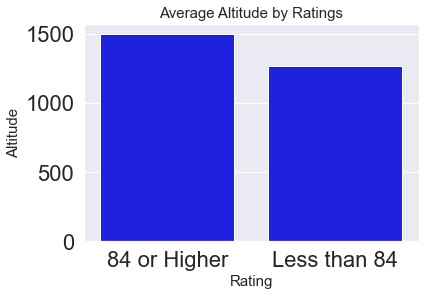

In [30]:
rating = ['84 or Higher', 'Less than 84']
rating_mean = [df_rating.altitude_mean_meters.mean(), df_without.altitude_mean_meters.mean()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('Rating',fontsize = 15, )
ax.set_ylabel('Altitude',fontsize = 15)
ax.set_title('Average Altitude by Ratings', fontsize = 15)
sns.set(font_scale = 2)
ax.set(xlabel='Rating', ylabel='Altitude')
plt.show()

### Question 1 At A Glance

    - 84 or higher rated coffee did have a higher altitude_mean_meters mean & median than coffee whos rating was less than 84.  
    - The mean and median were not too far off from one another for both rated and without

### Hypothesis Test
    Running a hypothesis test to make sure the results didn't happen by accident

### Significance Level

In [31]:
# A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
alpha = .05

### Checking Assumptions

    - Independent
    - Normally Distributed
    - Equal Variances

### Independent?
    Yes, I seperated excellent rated from non excellent rated

### Normally Distributed?
    - 84 or higher rated coffee is kind of normally distributed
    - Less than 84 rated coffee is normally distributed

<AxesSubplot:>

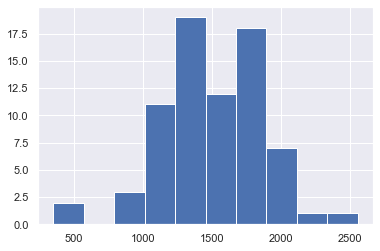

In [34]:
sns.set(font_scale = 1)
df_rating.altitude_mean_meters.hist()

<AxesSubplot:>

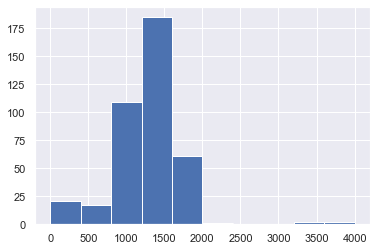

In [35]:
df_without.altitude_mean_meters.hist()

### Equal Variances?
    - The leven test concluded the populations did have equal variances.

In [38]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df_rating.altitude_mean_meters, df_without.altitude_mean_meters)
stats, p

(0.11918008274868731, 0.730079908882332)

In [39]:
# The small p-value suggests that the populations do not have equal variances.
if p < alpha:
    print("populations do not have equal variances")
else:
    print("populations do have equal variances")

populations do have equal variances


### Mann-Whitney's Test
    Assumptions were not met because I didn't feel comfortable with the distribution of coffee rated 84 or higher.  I will use a Non-Parametric Test.

### Hypothesis

### $H_0$: There is no difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee.
### $H_a$: There is a difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee.

In [40]:
stat, p = mannwhitneyu(df_rating.altitude_mean_meters, df_without.altitude_mean_meters)
stat, p

(9748.5, 1.9007266653308425e-06)

In [41]:
if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject Null Hypothesis


### Hypotheis Results
    - There is a difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee

### Question 1 Takeway
    - I have a 95% confidence level that there is a difference in altitude between 84 or higher rated and less than 84 rated coffee.  
    - 84 or higher rated coffee has a higher mean/median altitude than less than 84 rated coffee
    - altitude_mean_meters seems to be a good fit or useful for modeling.  I will include it in my models and see if this is true. 

# Question 2 

    - Is there a difference in the average 84 or higher rated coffee by processing_method?

<AxesSubplot:>

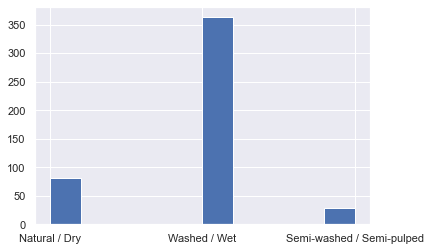

In [18]:
train.processing_method.hist()

In [19]:
len(df_rating)

74

In [20]:
len(df_without)

398

In [21]:
train.head(1)

,country,region,number_of_bags,harvest_year,grading_date,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,altitude_mean_meters,bag_weight,grading_month,grading_year,grading_day,excellent_rating
409,Colombia,pitalito,250,2013,2013-04-26,Caturra,Natural / Dry,7.67,7.67,7.5,7.67,7.92,7.42,10.0,10.0,10.0,7.5,83.33,0.11,0,0.0,Green,1,1000.0,70.0,4,2013,26,0


In [22]:
train.total_cup_points.value_counts()

83.00    16
83.17    15
82.42    14
82.92    11
81.83    11
         ..
77.83     1
87.92     1
84.83     1
74.00     1
73.83     1
Name: total_cup_points, Length: 120, dtype: int64